## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [ ]:
import pandas as pd

df_data = pd.read_csv('assets/real_estate.csv',sep=';')
print(df_data.describe())

#### What is the most expensive home in the dataset? (★☆☆)

In [5]:
#df_data.info()
#df_data.describe()

column = df_data["price"]
max_index = column.idxmax()
print(f"El Id de la casa mas cara {max_index}")


The id of the most expensive house is 13110


#### What is cheapest home in the dataset? (★☆☆)

In [10]:
column = df_data["price"]
min_index = column.idxmin()
print(f"El Id de la casa mas barata es {min_index}")


El Id de la casa mas barata es 366


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [9]:
column = df_data["surface"]
min_index = column.idxmin()
min = column.min()
max_index = column.idxmax()
max = column.max()
print(f"El Id de la casa más chica es {min_index} y su superficie es {min}")
print(f"El Id de la casa más chica es {max_index} y su superficie es {max}")

El Id de la casa más chica es 498 y su superficie es 15.0
El Id de la casa más chica es 6794 y su superficie es 249000.0


In [61]:
# valor del menor al mayor
data =df_data[df_data['surface']>0]
data_filtered_2 = data.sort_values(by='surface', ascending=True)

#### How many populations (level5) the dataset contains? (★☆☆)

In [62]:
level5_unicos = df_data["level5"].unique()
cant_level5 = len(level5_unicos)
print(cant_level5)

#print(level5_unicos.size)

168
168


#### Does the dataset contain NAs? (★☆☆)


In [11]:
#df_data.isnull().values.any()
#df_data.isna().sum()
df_data.isna().sum().sort_values(ascending = False)
#df_data.isnull().values.any()
#print(df_data.isnull().values.any())

customZone          15335
zipCode             15335
level6              14627
level8               8579
level4               6643
level7               2277
surface              1250
phone_realEstate      794
rooms                 353
bathrooms             345
description           142
realEstate_name        10
level1Id                0
level8Id                0
level7Id                0
level6Id                0
level5Id                0
level4Id                0
accuracy                0
level3Id                0
latitude                0
longitude               0
level2Id                0
Unnamed: 0              0
countryId               0
upperLevel              0
id_realEstates          0
level3                  0
level2                  0
level1                  0
country                 0
address                 0
date                    0
price                   0
url_inmueble            0
isNew                   0
level5                  0
dtype: int64

#### Delete the NAs of the dataset, if applicable (★★☆)

In [64]:
#if df_data.isnull().values.any():
#    stripped_data_frame = df_data.dropna()
#    print(stripped_data_frame)
#else:
#    print(df_data)

# No voy a borrar los NA porque no es aplicable, pero los voya a remplazar
# remplazar un campo de texto por sin determinar si es el valor es nulo uso para eso fillna
df_data['level6'].fillna("sin-determinar", inplace=True)
# remplazar un campo de numerico por cero si es el valor es nulo uso para eso fillna
df_data['bathrooms'].fillna(0, inplace=True)
#df = df.fillna(df.median())

#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [65]:
filtered_data_frame = df_data[df_data['level5'] == "Arroyomolinos (Madrid)"]
data_filtered_by_surface = filtered_data_frame[filtered_data_frame['surface']>0]
print(round(data_filtered_by_surface['price'].mean(),2))

297351.23


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

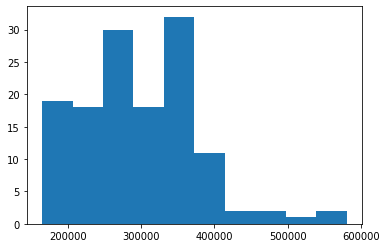


    Grafica de Precios  - Arroyomolinos (Madrid)
    


In [66]:
import matplotlib.pyplot as plt

filtered_data_frame = df_data[df_data['level5'] == "Arroyomolinos (Madrid)"]
data_filtered_by_price = filtered_data_frame[filtered_data_frame['price']>0]
plt.hist(data_filtered_by_price['price'])
plt.show()
observations = \
    """
    Grafica de Precios  - Arroyomolinos (Madrid)
    """
print(observations)



#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [79]:
#south_belt = df_data[df_data["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]

lista = ["Fuenlabrada","Leganés","Getafe","Alcorcón"]
boolean_series = df_data.level5.isin(lista)
data_filtered_south = df_data[boolean_series]
#print(data_filtered_south)

#### Make a bar plot of the median of prices (★★★) 

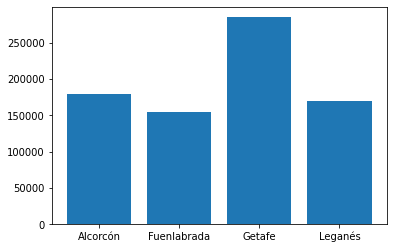

In [21]:
#import seaborn as sns
import matplotlib.pyplot as plt

#sns.barplot(x = data_filtered_south["level5"], y = data_filtered_south['price'], estimator = median)
#plt.show()

filtered_data_frame = df_data[df_data['level5'].isin(
    ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
filtered_data_frame = filtered_data_frame[['level5', 'price']]
grouped_filtered_data_frame = filtered_data_frame.groupby('level5').median()
keys = grouped_filtered_data_frame.index.values.tolist()
values = grouped_filtered_data_frame['price'].tolist()
plt.bar(keys, values)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [24]:
data_filtered_south.groupby('level5')['level5', 'price', 'rooms', 'surface', 'bathrooms'].agg('max')

#data_filtered_south.groupby('level5')['price'].max('max')

NameError: name 'data_filtered_south' is not defined

#### What is the most expensive home of each population? (★★☆) 

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [67]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [68]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

#### What happens if we do the same analysis for price/m2 (★★☆) 

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

#### How many  real estate agencies the dataset contains? (★★☆) 

#### What is the population (level 5) that contains the most houses? (★★☆) 